# Hyper Parameter Search Analysis

In [17]:
import pandas as pd
import configparser

config = configparser.ConfigParser()

# Load

## Vloss only

In [18]:
proj_dir = r'C:/Users/Admin/Code/PROPHET-Load_LSTM/'

#out_dir = r'data/output/impianto_4/hpsearch_250502/'
out_dir = r'data/output/zeh/hpsearch/'
hp_results_filename ='hp_search_patience1b.csv'

df = pd.read_csv(proj_dir + out_dir + hp_results_filename,
                 index_col=0)\
                     .sort_values('vloss')#,ascending=False)
                 
df

,units,n_back,dropout,vloss,sec_elaps
349,24,288,0.1,0.014074,57
482,72,144,0.1,0.014196,30
502,48,432,0.2,0.014212,81
318,120,432,0.2,0.014218,63
575,24,96,0.2,0.014221,45
...,...,...,...,...,...
38,12,12,0.1,0.017408,32
287,432,12,0.0,0.017679,17
36,12,384,0.0,0.018372,32
554,12,144,0.2,0.018571,20


In [4]:
config.read(proj_dir + out_dir + 'lstm_forecaster_copy.ini')
config_dict = {section: dict(config[section]) for section in config.sections()}
config_dict['data_opt']

{'n_back': '12',
 'n_timesteps': '24',
 'lag': '0',
 'tr_per': '0.9',
 'out_col': 'Etot',
 'target_col': 'power',
 'features': 'month,day,hour,minute,Tamb',
 'freq': '60',
 'data_path': 'data/input/HabitatZEH_60min_2016-2019.csv',
 'out_dir': 'data/output/zeh/'}

## Vloss and skill

### IMFs?

In [24]:
proj_dir = r'C:/Users/Admin/Code/PROPHET-Load_LSTM/'
out_dir = r'data/output/impianto_4/hpsearch/'
#out_dir = r'data/output/impianto_4/hpsearch_250502/'

hp_results_filename ='hp_search_patience1.csv'

df = pd.read_csv(proj_dir + out_dir + hp_results_filename,
                 index_col=0)\
                     .sort_values('skill',ascending=False)
                 
df

,units,n_back,n_dense,dropout,vloss,mae_pers,mae_pred,skill,frac_pos_skill,frac_0_mae_pers
68,144,480,36,0.1,0.007644,0.045575,0.037747,0.171771,0.551315,0.0
57,480,432,24,0.1,0.010057,0.045575,0.039341,0.136775,0.556809,0.0
5,480,96,24,0.1,0.009050,0.045575,0.039825,0.126175,0.541601,0.0
51,192,432,24,0.0,0.011263,0.045575,0.039835,0.125950,0.554749,0.0
12,48,72,36,0.1,0.011226,0.045575,0.040048,0.121265,0.537142,0.0
...,...,...,...,...,...,...,...,...,...,...
9,336,120,24,0.1,0.014122,0.045575,0.050126,-0.099866,0.449143,0.0
25,120,120,36,0.0,0.013818,0.045575,0.050314,-0.103992,0.467502,0.0
46,144,336,24,0.1,0.013886,0.045575,0.050390,-0.105641,0.463566,0.0
17,288,144,24,0.0,0.014040,0.045575,0.051325,-0.126165,0.453547,0.0


In [17]:
df.corr()['skill'].to_frame()

,skill
units,-0.007811
n_back,-0.024263
n_dense,0.246072
dropout,0.230792
vloss,-0.704042
mae_pers,NaN
mae_pred,-1.000000
skill,1.000000
frac_pos_skill,0.934012
frac_0_mae_pers,NaN


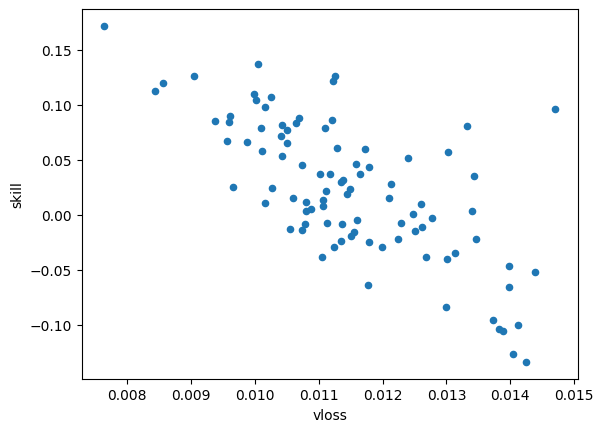

In [23]:
df.plot(x='vloss',y='skill',kind='scatter');

# Peak

## Load

In [21]:
proj_dir = r'C:/Users/Admin/Code/PROPHET-Load_LSTM'
out_dir = r'/data/output/zeh/peak/hpsearch/'

#hp_results_filename ='hp_search_patience1_continued.csv'
hp_results_filename = 'hp_search_patience1.csv'

df = pd.read_csv(proj_dir + out_dir + hp_results_filename,
                 index_col=0)\
                     .sort_values('vloss')#,ascending=False)
                     #.sort_values('skill',ascending=False)
                 
df

,units,n_back,dropout,vloss,sec_elaps
71,144,672,0.2,0.000590,199
464,72,624,0.1,0.000591,124
429,96,576,0.1,0.000597,139
407,48,864,0.0,0.000600,175
462,96,864,0.0,0.000604,172
...,...,...,...,...,...
606,24,24,0.2,0.001161,16
611,12,48,0.0,0.001168,23
178,624,120,0.2,0.001255,36
313,24,480,0.1,0.001276,35


In [22]:
df.corr()['vloss'].to_frame()

,vloss
units,0.010291
n_back,-0.146910
dropout,-0.052275
vloss,1.000000
sec_elaps,-0.286836
